In [84]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [86]:
IMAGE_SIZE = 256
Batch_size = 32

In [88]:
data_dir = r"C:\Users\balas\Downloads\archive\PlantVillage"


In [90]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    shuffle = True,
    image_size = (img_size,img_size),
    batch_size = Batch_size
)

Found 16002 files belonging to 10 classes.


In [91]:
class_names = dataset.class_names
print("Classes:", class_names)
print("Total:", len(class_names))

Classes: ['Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
Total: 10


In [92]:
len(dataset)

501

In [96]:
for image_batch , label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 0 4 9 1 9 9 0 1 5 4 0 9 7 7 1 7 9 2 2 5 2 7 3 6 4 6 0 7 4 8]


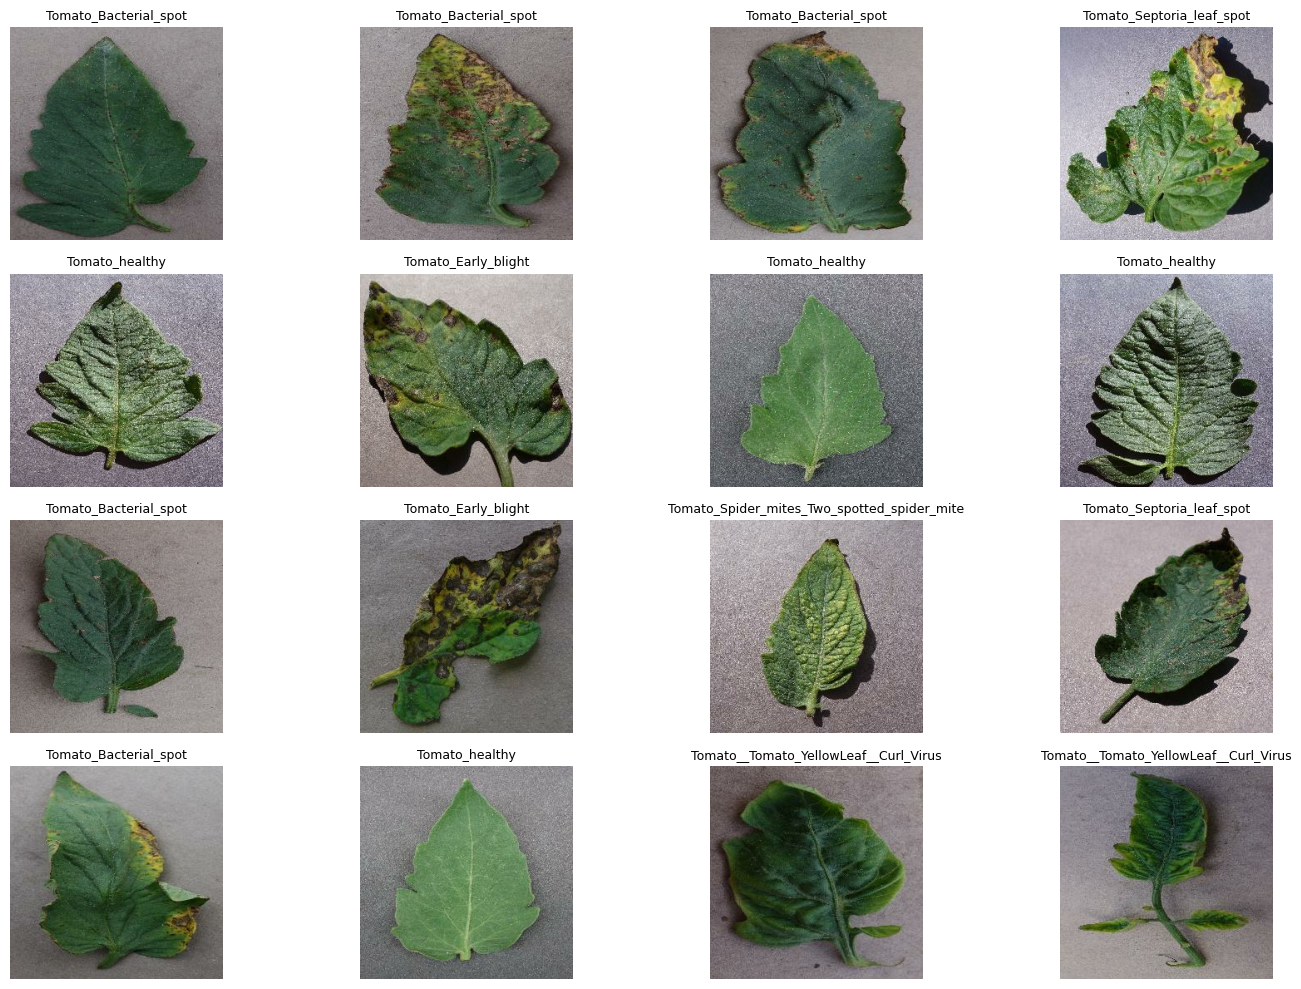

In [98]:
import matplotlib.pyplot as plt

class_names = dataset.class_names

plt.figure(figsize=(15, 10))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label_index = label_batch[i].numpy()
    plt.title(class_names[label_index].replace("Tomato___", ""), fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [99]:

train_size = 0.8
train_count = int(len(dataset) * train_size)
print(train_count)  


400


In [100]:
train_ds = dataset.take(train_count)
print(len(train_ds))  

400


In [101]:
test_ds = dataset.skip(train_count)
print(len(test_ds))  

101


In [102]:
valid_size = 0.1
valid_count = int(len(dataset) * valid_size)
print(valid_count)  

50


In [103]:
valid_ds = test_ds.take(valid_count)
print(len(valid_ds))  

50


In [104]:
test_ds = test_ds.skip(valid_count)
print(len(test_ds))  

51


In [105]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_ds = valid_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [113]:
from tensorflow.keras import layers

In [116]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])

In [118]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])


In [120]:
IMAGE_SIZE = 256
NUM_CLASSES = 10 
model = models.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

C:\Users\balas\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [122]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [124]:
EPOCHS = 20
history = model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=EPOCHS
)

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 506s 1s/step - accuracy: 0.4963 - loss: 1.4783 - val_accuracy: 0.5731 - val_loss: 1.2566
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 485s 1s/step - accuracy: 0.6755 - loss: 0.9374 - val_accuracy: 0.7638 - val_loss: 0.7238
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 464s 1s/step - accuracy: 0.7359 - loss: 0.7666 - val_accuracy: 0.7850 - val_loss: 0.6365
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 452s 1s/step - accuracy: 0.7586 - loss: 0.6991 - val_accuracy: 0.7487 - val_loss: 0.9648
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 423s 1s/step - accuracy: 0.7915 - loss: 0.6166 - val_accuracy: 0.7825 - val_loss: 0.7190
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 313s 783ms/step - accuracy: 0.8063 - loss: 0.5575 - val_accuracy: 0.7794 - val_loss: 0.7414
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 306s 764ms/step - accuracy: 0.8238 - loss: 0.5075 - val_accuracy: 0.8531 - val_loss: 0.4609
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 304s 761ms/step - accuracy: 0.8340 - loss: 0.4815 -

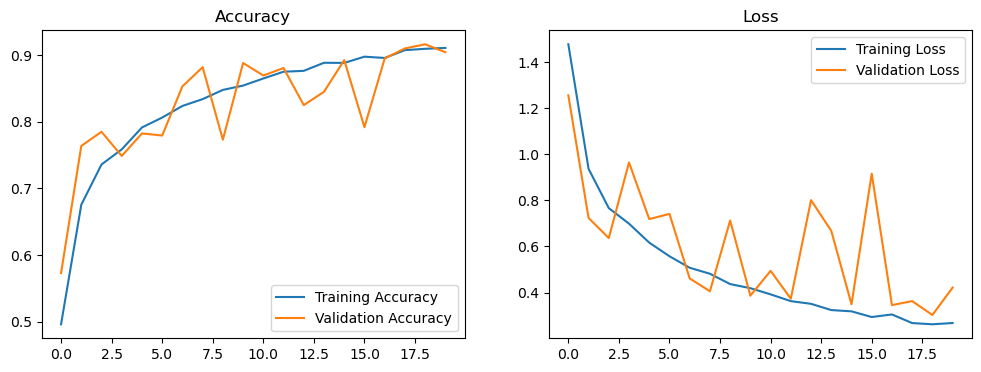

In [125]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()


In [134]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array


img_path = r"C:\Users\balas\Downloads\archive\e3b5600f-9c88-4060-826f-aa7c972c9325___GH_HL Leaf 291.JPG"

img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)


predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])


class_names = dataset.class_names
print(f"Predicted Class: {class_names[predicted_class]}")
print(f"Confidence: {np.max(predictions[0]) * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Predicted Class: Tomato_Late_blight
Confidence: 100.00%
